In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv


**If this EDA helps you , make sure to upvote!**

# Spotify Top-hits Data Analysis :

In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot


In [3]:
#Loading Dataset
df = pd.read_csv("/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv")

In [4]:
#Viewing the first 5 rows of dataset
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [5]:
#viewing the last 5 rows of dataset
df.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


In [6]:
#checking unique year of release in dataset
df.year.unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014])

##### **we are able to see the fact there are few releases from the years 1998,1999 and 2020 too , considering the fact that the title of the dataset tells 2000-2019 . we need to remove the extra data from our analysis**

In [7]:
# removing extra data
years_drop = df[(df['year'] < 2000) | (df['year'] > 2019)].index
df = df.drop(years_drop)

In [8]:
#rechecking unique year
df.year.unique()

array([2000, 2001, 2011, 2002, 2016, 2018, 2004, 2010, 2015, 2006, 2008,
       2019, 2003, 2013, 2005, 2012, 2007, 2009, 2017, 2014])

In [9]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [10]:
#to gather shape and size of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1958 non-null   object 
 1   song              1958 non-null   object 
 2   duration_ms       1958 non-null   int64  
 3   explicit          1958 non-null   bool   
 4   year              1958 non-null   int64  
 5   popularity        1958 non-null   int64  
 6   danceability      1958 non-null   float64
 7   energy            1958 non-null   float64
 8   key               1958 non-null   int64  
 9   loudness          1958 non-null   float64
 10  mode              1958 non-null   int64  
 11  speechiness       1958 non-null   float64
 12  acousticness      1958 non-null   float64
 13  instrumentalness  1958 non-null   float64
 14  liveness          1958 non-null   float64
 15  valence           1958 non-null   float64
 16  tempo             1958 non-null   float64


In [11]:
#to gather information regarding data
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000
mean,228294.167518,2009.687436,59.805414,0.667258,0.720057,5.387640,-5.502172,0.554137,0.104174,0.128534,0.015371,0.181406,0.551287,120.080067
std,39006.575187,5.715210,21.511567,0.140353,0.152390,3.610776,1.925689,0.497188,0.096524,0.173719,0.088407,0.140584,0.220393,26.962314
min,113000.000000,2000.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203422.750000,2005.000000,56.000000,0.581000,0.624000,2.000000,-6.481000,0.000000,0.039700,0.014000,0.000000,0.088600,0.386250,98.592000
50%,223059.500000,2010.000000,66.000000,0.676000,0.736000,6.000000,-5.279500,1.000000,0.060850,0.055300,0.000000,0.124000,0.557000,120.020500
75%,247376.250000,2015.000000,73.000000,0.763750,0.837000,8.000000,-4.166250,1.000000,0.131000,0.176000,0.000064,0.241000,0.729750,134.147250
max,484146.000000,2019.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [12]:
#checking null values in dataset
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

### **Variable Description**

* artist: Name of the Artist.

* song: Name of the Track.
 
* duration_ms: Duration of the track in milliseconds.
 
* explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
 
* year: Release Year of the track.
 
* popularity: The higher the value the more popular the song is.
 
* danceability: Danceability describes how suitable a track is for dancing.
 
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
 
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
 
* loudness: Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
 
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.
 
* speechiness: Speechiness detects the presence of spoken words in a track.

* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
 
* instrumentalness: Predicts whether a track contains no vocals.
 
* liveness: Detects the presence of an audience in the recording.

* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
 
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
 
* genre: Genre of the track.

### 1) Artists

#### **how many artists do we have?**

In [13]:
artist=df['artist'].value_counts()
artist

Rihanna            25
Drake              23
Eminem             21
Calvin Harris      20
David Guetta       18
                   ..
Tim Berg            1
Counting Crows      1
Yolanda Be Cool     1
Benny Benassi       1
Blanco Brown        1
Name: artist, Length: 819, dtype: int64

##### **There is a total of 835 artists present in the top-hits category of spotify **


####  **Who are the top 10 artists?**

In [14]:
top_10_artists = df.groupby('artist')[['artist','explicit','danceability','popularity','loudness','energy','speechiness','instrumentalness','acousticness','liveness','genre']].sum().sort_values('popularity',
                                                               ascending=False).head(10)
top_10_artists

,explicit,danceability,popularity,loudness,energy,speechiness,instrumentalness,acousticness,liveness
artist,,,,,,,,,
Rihanna,8,16.482,1803,-137.276,16.844,1.9983,0.153460,3.811065,3.7089
Eminem,20,15.603,1519,-83.568,16.374,4.6724,0.001437,2.212270,4.0052
Drake,18,16.859,1424,-164.954,13.767,3.7478,0.100460,1.995427,3.8368
Calvin Harris,1,13.719,1356,-77.276,17.429,1.1381,1.041232,1.559682,4.3994
David Guetta,2,11.089,1185,-69.850,14.444,1.3803,0.176915,1.622460,4.0110
Britney Spears,1,12.824,1140,-99.761,13.276,1.3332,0.027574,4.336690,2.8040
Taylor Swift,0,10.105,1125,-94.796,11.222,1.2955,0.012130,1.158330,2.1732
Chris Brown,6,11.652,1080,-87.028,11.546,1.8561,0.004574,0.760747,2.3684
Kanye West,14,10.658,1049,-105.484,12.002,3.7812,1.000080,1.765526,4.3074


#### **The top 5 artists**

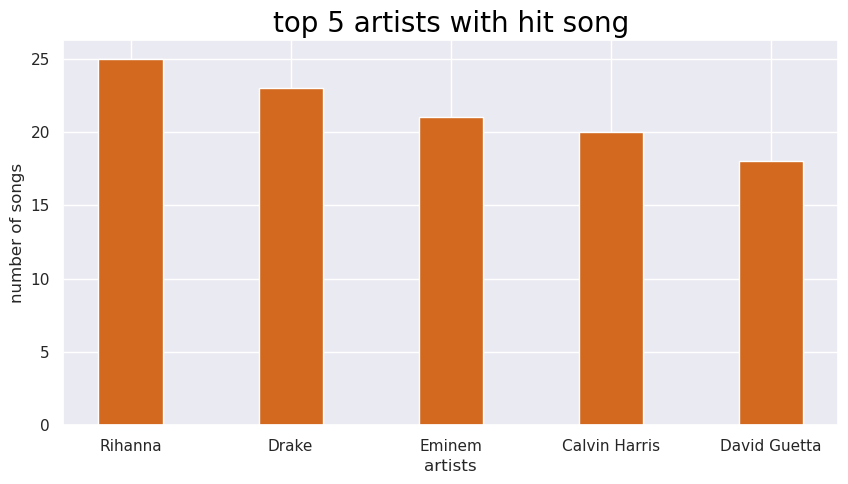

In [15]:
tp_artists_songs = artist[:5]
tp_artists_name = artist[:5].index
fig = plt.figure(figsize = (10,5))
plt.bar(tp_artists_name,tp_artists_songs,width = 0.4,color = "chocolate")
plt.xlabel('artists')
plt.ylabel('number of songs')
plt.title('top 5 artists with hit song',color = 'black',fontsize = 20)
plt.show()

* Rihanna is the top artist with 25 hit songs

* followeed by Drake and Eminem with 23 hit songs and 21 hit songs repectively

### 2)  Top 5 Genres

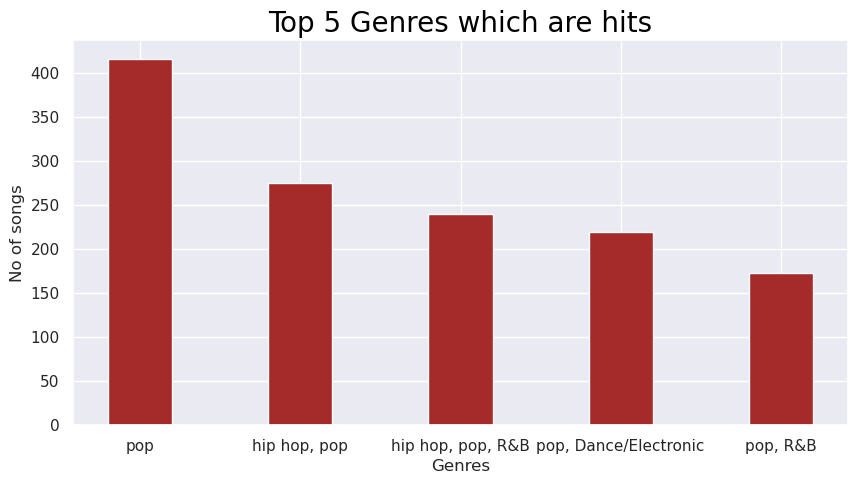

In [16]:
genre = df['genre'].value_counts()

tp_genres=genre[:5]
tp_genres_names=genre[:5].index
fig = plt.figure(figsize = (10, 5))
plt.bar(tp_genres_names,tp_genres,width = 0.4,color='brown')
plt.xlabel("Genres")
plt.ylabel("No of songs")
plt.title('Top 5 Genres which are hits',color = 'black',fontsize = 20)
plt.show()

* Pop seems to be the most popular type of genre
* 428 songs of the top-hits spotify songs since 2000-2019 belong to pop
* This is followed by hip-hop,pop which is the 2nd most popular conbination of genre

### **3) Songs**

#### **Number of top hit songs released each year**

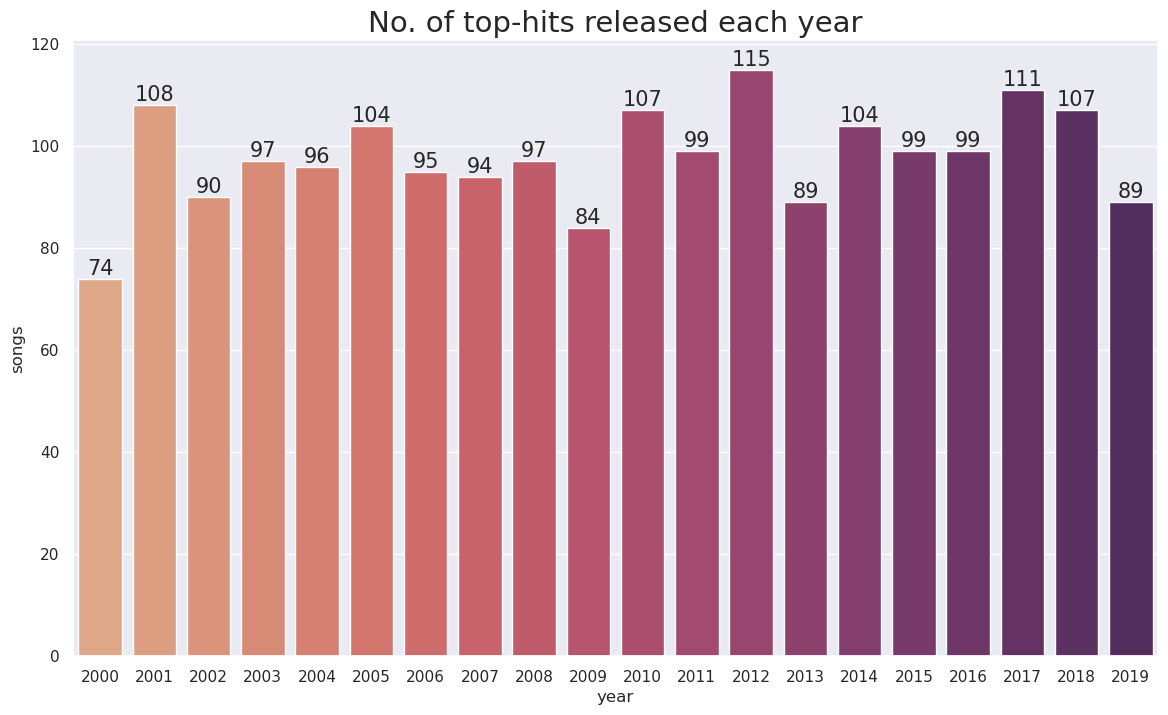

In [17]:
song_year = df.year.value_counts().rename_axis('year').reset_index(name='songs') 
plt.figure(figsize=(14,8))
plt.title("No. of top-hits released each year",fontsize=21)
c1 = sns.barplot(x="year",y="songs",data=song_year,palette="flare")
c1.bar_label(c1.containers[0],size = 15)
plt.show()


* In the year 2012 we got most number of Top-Hits with 115 songs
* This is followed by year 2017 with 111 songs

#### **Top 5 most popular songs**

In [18]:
df.sort_values('popularity', axis = 0, ascending =False).head(5)[['popularity','song','artist']]

,popularity,song,artist
1322,89,Sweater Weather,The Neighbourhood
1311,88,Another Love,Tom Odell
201,87,Without Me,Eminem
1929,86,lovely (with Khalid),Billie Eilish
6,86,The Real Slim Shady,Eminem


* Sweater Weather  by The Neighbourhood is the most popular song

* Another Love by Tom Odell is 2nd most popular song

### **4)Duration of songs**

In [19]:
def ms_to_minsec(ms):
    sec = ms/1000
    return f"{int(sec//60)}:{int(sec%60)}"

durations = df[['duration_ms','year']].groupby('year').mean().reset_index().iloc[2:22]
durations['duration_s'] = durations['duration_ms'] / 1000
durations['min:sec'] = durations['duration_ms'].apply(ms_to_minsec)


iplot(px.line(durations, 
        x='year', 
        y='duration_s',
        title='average song duration over the years',
        text='min:sec'
       ).update_xaxes(type='category').update_traces(textposition='top right'))

* Average duration of Top-Hit songs kept on decreasing year by year, indicating people are liking short duration songs

#### **longest and shortest hit song**

In [20]:
asdy = df[['artist','song','duration_ms','year']]
print(asdy[asdy.duration_ms == asdy.duration_ms.max()])
print(asdy[asdy.duration_ms == asdy.duration_ms.min()])

                 artist     song  duration_ms  year
1381  Justin Timberlake  Mirrors       484146  2013
         artist           song  duration_ms  year
1931  Lil Nas X  Old Town Road       113000  2019


**stats regarding song duration**

* The longest song is Mirrors by Justin Timberlake: 8:04s

* The shortest song is Old Town Road by Lil Nas X: 1:53s

### **5)Explicit content**

In [21]:
fig = px.pie(df.groupby('explicit', as_index=False).count().sort_values(by='song',ascending=False),names='explicit',values='song',labels={'song':'Total songs'},hole=.6,color_discrete_sequence=['green','crimson'],template='plotly_dark',title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)

* 72.4% of songs doesn't have explicit lyrics. That means we can also say that most of the songs are children friendly.

* less the explicit content more the chances of that song to become top hit.

### **6)Histograms**

In [22]:
from plotly.subplots import make_subplots

histogram_labels = ['popularity',
                    'danceability', 
                    'energy', 
                    'speechiness', 
                    'loudness', 
                    'acousticness', 
                    'liveness', 
                    'instrumentalness',
                    'valence',
                    'tempo'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       height=400, 
                       width=500,
                       color_discrete_sequence=[colors[i]]
                       )
    iplot(fig)

In [23]:
df_new = df[['duration_ms', 'year', 'popularity', 'danceability', 'energy', 
     'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

data1={'heading':['Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
       'data':[df_new['speechiness'].mean(),df_new['acousticness'].mean(),df_new['instrumentalness'].mean(),
      df_new['liveness'].mean(),df_new['valence'].mean(),df_new['tempo'].mean()]}

df2 = pd.DataFrame(data1)
df2 

,heading,data
0,Speechiness,0.104174
1,Acousticness,0.128534
2,Instrumentalness,0.015371
3,Liveness,0.181406
4,Valence,0.551287
5,Tempo,120.080067


* From the above analysis we can suggest that:
* The danceability and energy on average for the top-hits are generally high , indicating that these songs are high on intensity.
* The loudness of the top-hits are also high compared to the rest of the songs.
* Speechiness of top-hits are quite low.
* Instrumentalness of songs are also low , which gives a pretty clear idea as to how music-taste has evolved among listeners. The late 20th century was dominated by the bands as the years progressed we got to witness a decline in the number of bands being popular and thus instrumentalness also declined over the years expect few.
* Acousticness of tracks are also low , suggesting that songs which tend to become top-hits are high in energy and tempo.
* Songs which become top-hits score low on liveness indicating the songs are mostly recorded.
* Top-hits on average score just above 0.5 on valence indicating that while most top-hits have a positive mood associated with them , still top-hits have quite a equal mixture of both positive and sad sounding associated with them.
* Last but not the least the tempo for most of the top-hits on average is 120bpm suggesting that songs which are peppy and fast sounding.

### **7)Keys**


In [24]:
iplot(px.pie(df['key'].value_counts().reset_index(), 
       names=r'C C♯/D♭ D E♭/D♯ E F F♯/G♭ G A♭/G♯ A B♭/A♯ B'.split(), 
       values='key',
       color_discrete_sequence = px.colors.qualitative.Set3,
       title='Key Distribution'
      ).update_traces(textinfo='label+percent'))

* C is most popular key among the top hits.

* B is the least popular key among the top hits

## Conclusion:

**From the above analysis we can infer the following:**

* Rihanna is the top artist with 25 hit songs
* Pop seems to be the most popular type of genre, 428 songs of the top-hits spotify songs since 2000-2019 belong to pop
* In the year 2012 we got most number of Top-Hits with 115 songs
* Sweater Weather by The Neighbourhood is the most popular song
* average duration of songs kept on decreasing year by year
* less the explicit content more the chances of that song to become top hit.
* Most of the hit songs scored low on speechiness, liveliness, instrumentalness and acousticness as these tracks contains lot of lyrics, vocalsad-libs which can be sung at the weddings, at the beach side karoke etc. In other words soothing songs which one can relax to.
* C is most popular key among the top hits.

## Thankyou for going through my notebook!✨

### Please leave your suggestions in the comments!


#### if this notebook helped you please give an upvote :)

